<Axes: >

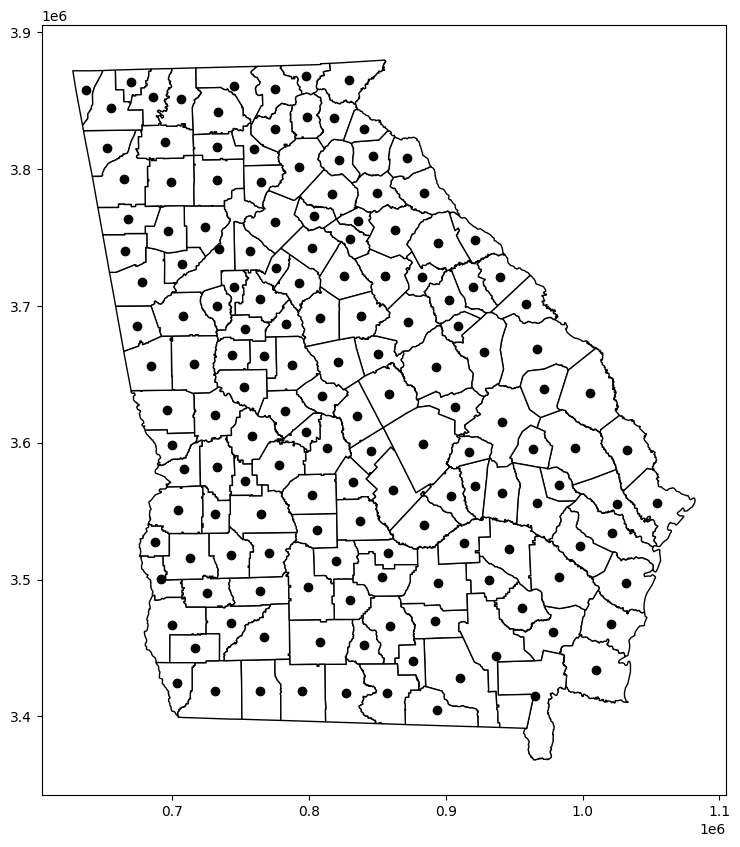

In [3]:
import numpy as np
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
#Load Georgia dataset and generate plot of Georgia counties (figure 1)
georgia_data = pd.read_csv(ps.examples.get_path('GData_utm.csv'))
georgia_shp = gp.read_file(ps.examples.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize=(10,10))
georgia_shp.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
georgia_shp.centroid.plot(ax=ax, c='black')


In [5]:
#Prepare Georgia dataset inputs
g_y = georgia_data['PctBach'].values.reshape((-1,1))
#[[1,2],[3,4],[5,6],[7,8]]
#print(g_y)
g_X = georgia_data[['PctFB', 'PctBlack', 'PctRural']].values

"""
print(g_X)
#[[6.400e-01 2.076e+01 7.560e+01]
 [1.580e+00 2.686e+01 1.000e+02]
 [2.700e-01 1.542e+01 6.170e+01]
 [1.100e-01 5.167e+01 1.000e+02]
 [1.430e+00 4.239e+01 4.270e+01]]
"""
u = georgia_data['X']
v = georgia_data['Y']
g_coords = list(zip(u,v))
#print(u, v)
#print(v)
#print(g_y)
#print(g_X)
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

[[6.400e-01 2.076e+01 7.560e+01]
 [1.580e+00 2.686e+01 1.000e+02]
 [2.700e-01 1.542e+01 6.170e+01]
 [1.100e-01 5.167e+01 1.000e+02]
 [1.430e+00 4.239e+01 4.270e+01]
 [3.400e-01 3.490e+00 1.000e+02]
 [9.200e-01 1.144e+01 6.460e+01]
 [8.200e-01 9.210e+00 7.520e+01]
 [3.300e-01 3.133e+01 4.700e+01]
 [1.190e+00 1.162e+01 6.620e+01]
 [1.060e+00 4.168e+01 1.610e+01]
 [6.400e-01 2.236e+01 5.790e+01]
 [3.300e-01 4.580e+00 1.000e+02]
 [1.760e+00 4.147e+01 6.560e+01]
 [4.500e-01 1.485e+01 8.060e+01]
 [1.160e+00 2.595e+01 6.320e+01]
 [4.300e-01 5.219e+01 7.230e+01]
 [7.200e-01 3.548e+01 7.340e+01]
 [1.000e-01 5.889e+01 1.000e+02]
 [2.140e+00 2.019e+01 4.710e+01]
 [9.600e-01 3.094e+01 5.210e+01]
 [8.500e-01 1.546e+01 6.850e+01]
 [3.900e-01 9.100e-01 4.360e+01]
 [4.200e-01 2.705e+01 1.000e+02]
 [2.050e+00 3.802e+01 5.100e+00]
 [6.740e+00 3.094e+01 1.370e+01]
 [1.100e-01 8.610e+00 7.740e+01]
 [1.570e+00 1.770e+00 5.780e+01]
 [4.470e+00 2.623e+01 1.760e+01]
 [4.500e-01 6.076e+01 1.000e+02]
 [4.230e+0

In [9]:
#Calibrate GWR model

gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

117.0


In [5]:
gwr_results.params[0:5]

array([[-0.23204579,  0.22820815,  0.05697445, -0.42649461],
       [-0.2792238 ,  0.16511734,  0.09516542, -0.41226348],
       [-0.248944  ,  0.20466991,  0.07121197, -0.42573638],
       [-0.23036768,  0.1527493 ,  0.0510379 , -0.35938659],
       [ 0.19066196,  0.71627541, -0.16920186, -0.24091753]])

In [6]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 159
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             71.793
Log-likelihood:                                                    -162.399
AIC:                                                                332.798
AICc:                                                               335.191
BIC:                                                               -713.887
R2:                                                                   0.548
Adj. R2:                                                              0.540

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------